In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import obspy as op
import glob
import os
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from itertools import repeat, chain

matplotlib.rcParams.update({'font.size': 18})

In [4]:
datalistr = []
datalistSr = []
dir_listr = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/'):
    for datafile in files:
        if datafile.startswith('model_9_vs'):
            datalistr.append(os.path.join(root, datafile))
datalistSr = sorted(datalistr)

In [5]:
list_model = []
for i,j in enumerate(datalistSr):
    if 'gcarc_30_2.5' in j:
        list_model.append(j) 

In [6]:
list_model_real = ['/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/BPPF/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/STSN/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/GRJU/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/GENI/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_2.5/BDCO/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/PRDT/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/STSR/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/BUCO/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/TRZN/model_9_vs.txt']


In [7]:
STA_list = [i.split('/')[8] for i in list_model_real]

In [8]:
STA_list

['BPPF', 'STSN', 'GRJU', 'GENI', 'BDCO', 'PRDT', 'STSR', 'BUCO', 'TRZN']

In [9]:
STA_distance = np.arange(0,600,70)

In [10]:
models_joint = [np.genfromtxt(i) for i in list_model_real]

In [11]:
vs = [[],[],[],[],[],[],[],[],[]]
prof = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(models_joint):
    for k,l in enumerate(j):
        vs[i].append(l[0])
        prof[i].append((-1)*(l[1]))

In [12]:
len(prof)

9

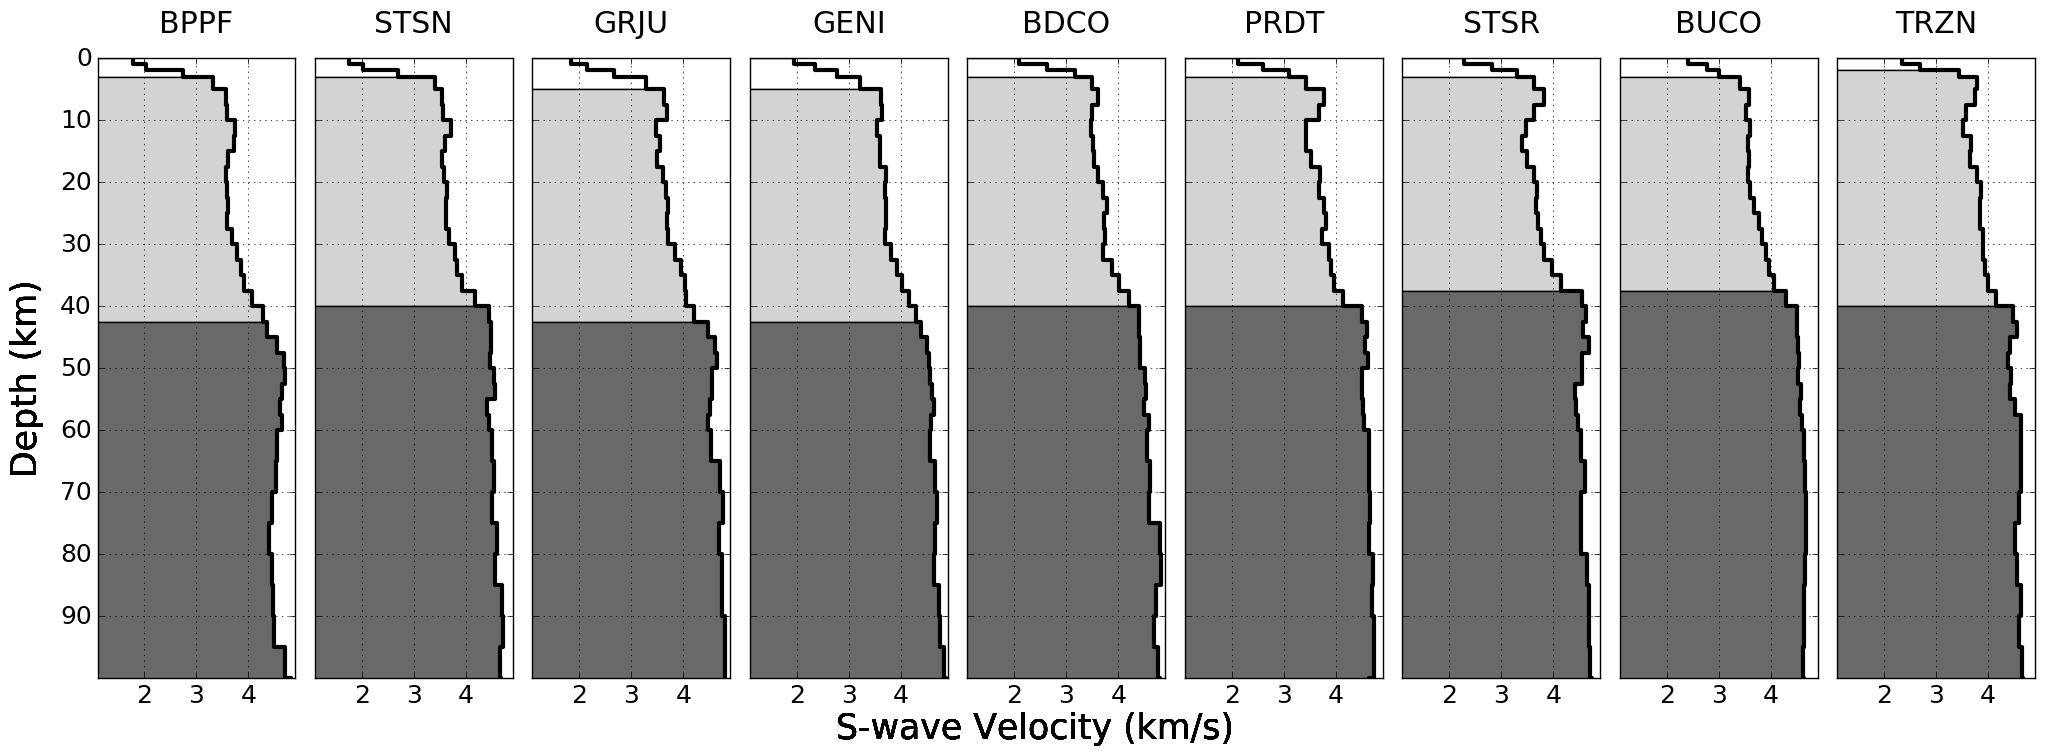

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=9, sharey=True,sharex=True,figsize = (25,8),facecolor='white')

for ax, title, x, y in zip(axes.flat, STA_list, vs, prof):
    ax.step(x, y,'k',lw=3, where='post')
    ax.set_xlim([1,5])
    ax.fill_betweenx(y,0,x,where=[i <=3.3 for i in x],facecolor='white')
    ax.fill_betweenx(y,0,x,where=[i >=3.3 and i <=4.3 for i in x],facecolor='lightgray')
    ax.fill_betweenx(y,0,x,where=[i >=4.3 for i in x],facecolor='dimgrey')
    #ax.xaxis.tick_top()
    #ax.hlines(5,1,6,linestyles='dashed')
    #ax.hlines(38,1,6,linestyles='dashed')
    #ax.hlines(44,1,6,linestyles='dashed')
    ax.xaxis.set_ticks(np.arange(1, 5, 1))
    ax.set_ylim([100,0])
    ax.set_xlim([1.1,4.9])
    ax.yaxis.set_ticks(np.arange(0, 100, 10))
    ax.set_title(title, y=1.03)
    fig.text(0.5, 0.05, 'S-wave Velocity (km/s)', ha='center',fontsize=25)
    fig.text(0.09, 0.5, 'Depth (km)', va='center', rotation='vertical',fontsize=25)    
    ax.grid(True)
    plt.subplots_adjust(wspace=0.1)
fig.savefig('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/section_joint_inversion_25.png',dpi=300)

# Média do Modelo de  Velocidade

In [14]:
vs_sum = [sum(i)/9 for i in zip(*vs)]
vs_media = vs_sum[::2]
prof_model = prof[0][::2]

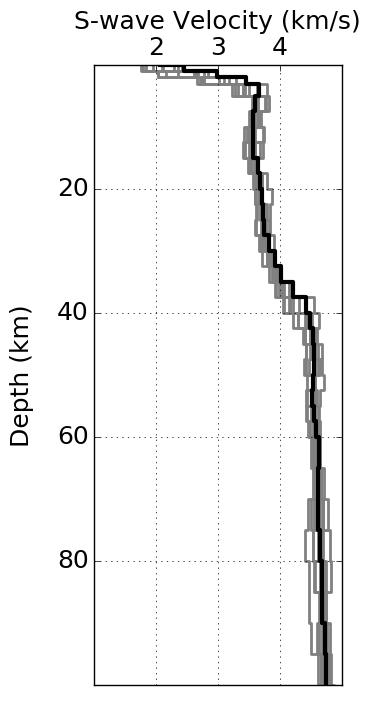

In [75]:
fig = plt.figure(figsize = (6,8),facecolor='white')
gs1 = gridspec.GridSpec(1,1)

ax = plt.subplot(gs1[0])
for x, y in zip(vs, prof):
    ax.step(x, y,'grey',lw= 2, where='post')
    ax.set_xlim([1.00001,4.99])
    ax.xaxis.tick_top()
    ax.set_ylabel('Depth (km)')
    ax.set_xlabel('S-wave Velocity (km/s)', va = 'top')
    ax.xaxis.set_ticks(np.arange(2, 5, 1))
    ax.set_ylim([99.9999,0.001])
    ax.xaxis.set_label_position('top') 
    ax.grid(True)
    ax.set_aspect(0.1)

ax.step(vs_media,prof_model,'k',lw= 3, where='post')
fig.savefig('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/model_medio_joint_inversion_25.png',dpi=300)

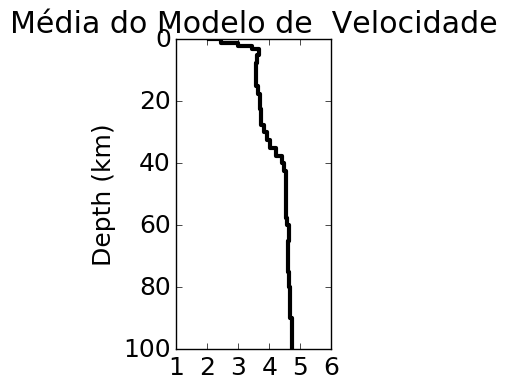

In [71]:
fig = plt.figure(figsize = (4,4),facecolor='white')
gs1 = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs1[0])
ax1.step(vs_media,prof_model,'k',lw= 3, where='post')
ax1.set_ylabel('Depth (km)')
ax1.set_xlim([1,6])
ax1.set_ylim([100,0])
ax1.set_title('Média do Modelo de  Velocidade')
ax1.set_aspect(0.1)

fig.savefig('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/earth_model_medio_parnaiba/section_joint_inversion_25_medio.png')

In [76]:
dist_prof_model = [y - x for x,y in zip(prof_model,prof_model[1:])]
dist_prof_model.append(10)
dist_prof_model = [round(i,1) for i in dist_prof_model]
data = np.array([vs_media,dist_prof_model])
data = data.T

np.savetxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/earth_model_medio_parnaiba/vs_model.txt',vs,fmt='%.4f')
np.savetxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/earth_model_medio_parnaiba/prof_model.txt',prof_model,fmt='%.1f',newline='\t')
np.savetxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/earth_model_medio_parnaiba/dist_prof_model.txt',data,fmt='%.4f')

In [77]:
vp = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/earth_model_medio_parnaiba/model_parnaiba',skip_header=1,defaultfmt='%.4f')[:,1]
np.savetxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/earth_model_medio_parnaiba/vp_model.txt',vp,fmt='%.4f')


In [78]:
repeat_vel = [int(round(i/0.5)) for i in dist_prof_model] 
list_vp = list(vp)
list_vs = list(vs)

In [79]:
pvel = list(chain.from_iterable(repeat(value, count) for value, count in zip(list_vp, repeat_vel)))
np.savetxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/earth_model_medio_parnaiba/pvel.txt',pvel,fmt='%.4f')
svel = list(chain.from_iterable(repeat(value, count) for value, count in zip(list_vs, repeat_vel)))
np.savetxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/earth_model_medio_parnaiba/svel.txt',svel,fmt='%.4f')

# Gráfico Vp/Vs e Espessura Crustal

In [80]:
datalistr = []
datalistSr = []
dir_listr = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/'):
    for datafile in files:
        if datafile.startswith('VALUES'):
            datalistr.append(os.path.join(root, datafile))
datalistSr = sorted(datalistr)

In [81]:
datalist_10 = []
datalist_25 = []

for i,j in enumerate(datalistSr):
    if '_1.0' in j:
        datalist_10.append(j) 
    else:
        datalist_25.append(j)

In [82]:
vp63_10 = []
vp64_10 = []
vp65_10 = []
vp66_10 = []

for i,j in enumerate(datalist_10):
    if '63' in j:
        vp63_10.append(j) 
    elif '64' in j:
        vp64_10.append(j)
    elif '65' in j:
        vp65_10.append(j)
    else:
        vp66_10.append(j)

In [83]:
var_63_10 = [np.genfromtxt(i) for i in vp63_10]
var_64_10 = [np.genfromtxt(i) for i in vp64_10]
var_65_10 = [np.genfromtxt(i) for i in vp65_10]
var_66_10 = [np.genfromtxt(i) for i in vp66_10]
var_10 = [var_63_10,var_64_10,var_65_10,var_66_10]

In [84]:
STA_l = [i.split('/')[8] for i in vp63_10]

In [85]:
STA_color = ['b', 'c', 'y', 'm', 'r', 'k', 'g', 'grey', 'pink' ]

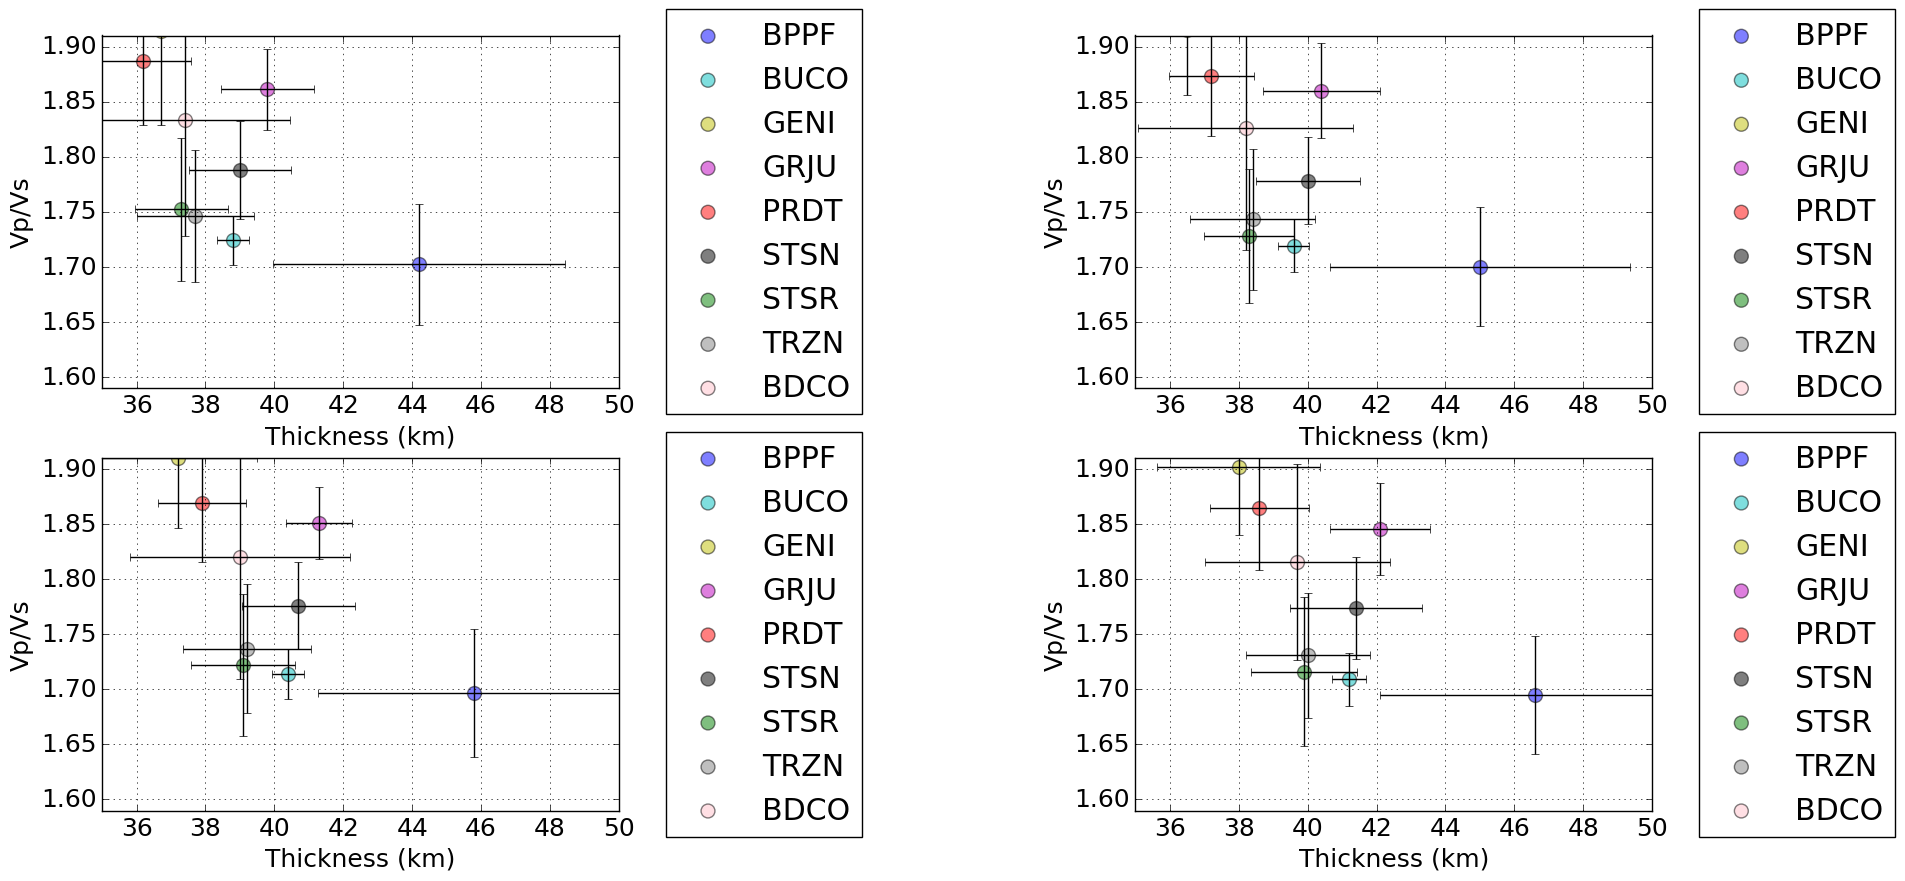

In [86]:
fig = plt.figure(figsize = (20,10),facecolor='white')
gs1 = gridspec.GridSpec(2,2,wspace=1)

for k,l in enumerate(var_10):
    for i,j in enumerate(l):
        ax1 = plt.subplot(gs1[k])
        ax1.scatter(j[2],j[0],c=STA_color[i],s=100,alpha=0.5,cmap=plt.cm.hsv,label=STA_l[i])
        ax1.errorbar(j[2],j[0],yerr=j[1],xerr=j[3],c='k')
        #ax1.text(j[2]-1.8,j[0],STA_l[i])
        ax1.set_xlabel('Thickness (km)')
        ax1.set_ylabel('Vp/Vs')
        ax1.set_xlim([35,50])
        ax1.set_ylim([1.59,1.91])
        ax1.grid(True)
        ax1.legend(scatterpoints=1,loc='right', bbox_to_anchor=(1.5, 0.5))

In [87]:
vp63_25 = []
vp64_25 = []
vp65_25 = []
vp66_25 = []

for i,j in enumerate(datalist_25):
    if '63' in j:
        vp63_25.append(j) 
    elif '64' in j:
        vp64_25.append(j)
    elif '65' in j:
        vp65_25.append(j)
    else:
        vp66_25.append(j)

In [88]:
var_63_25 = [np.genfromtxt(i) for i in vp63_25]
var_64_25 = [np.genfromtxt(i) for i in vp64_25]
var_65_25 = [np.genfromtxt(i) for i in vp65_25]
var_66_25 = [np.genfromtxt(i) for i in vp66_25]
var_25 = [var_63_25,var_64_25,var_65_25,var_66_25]

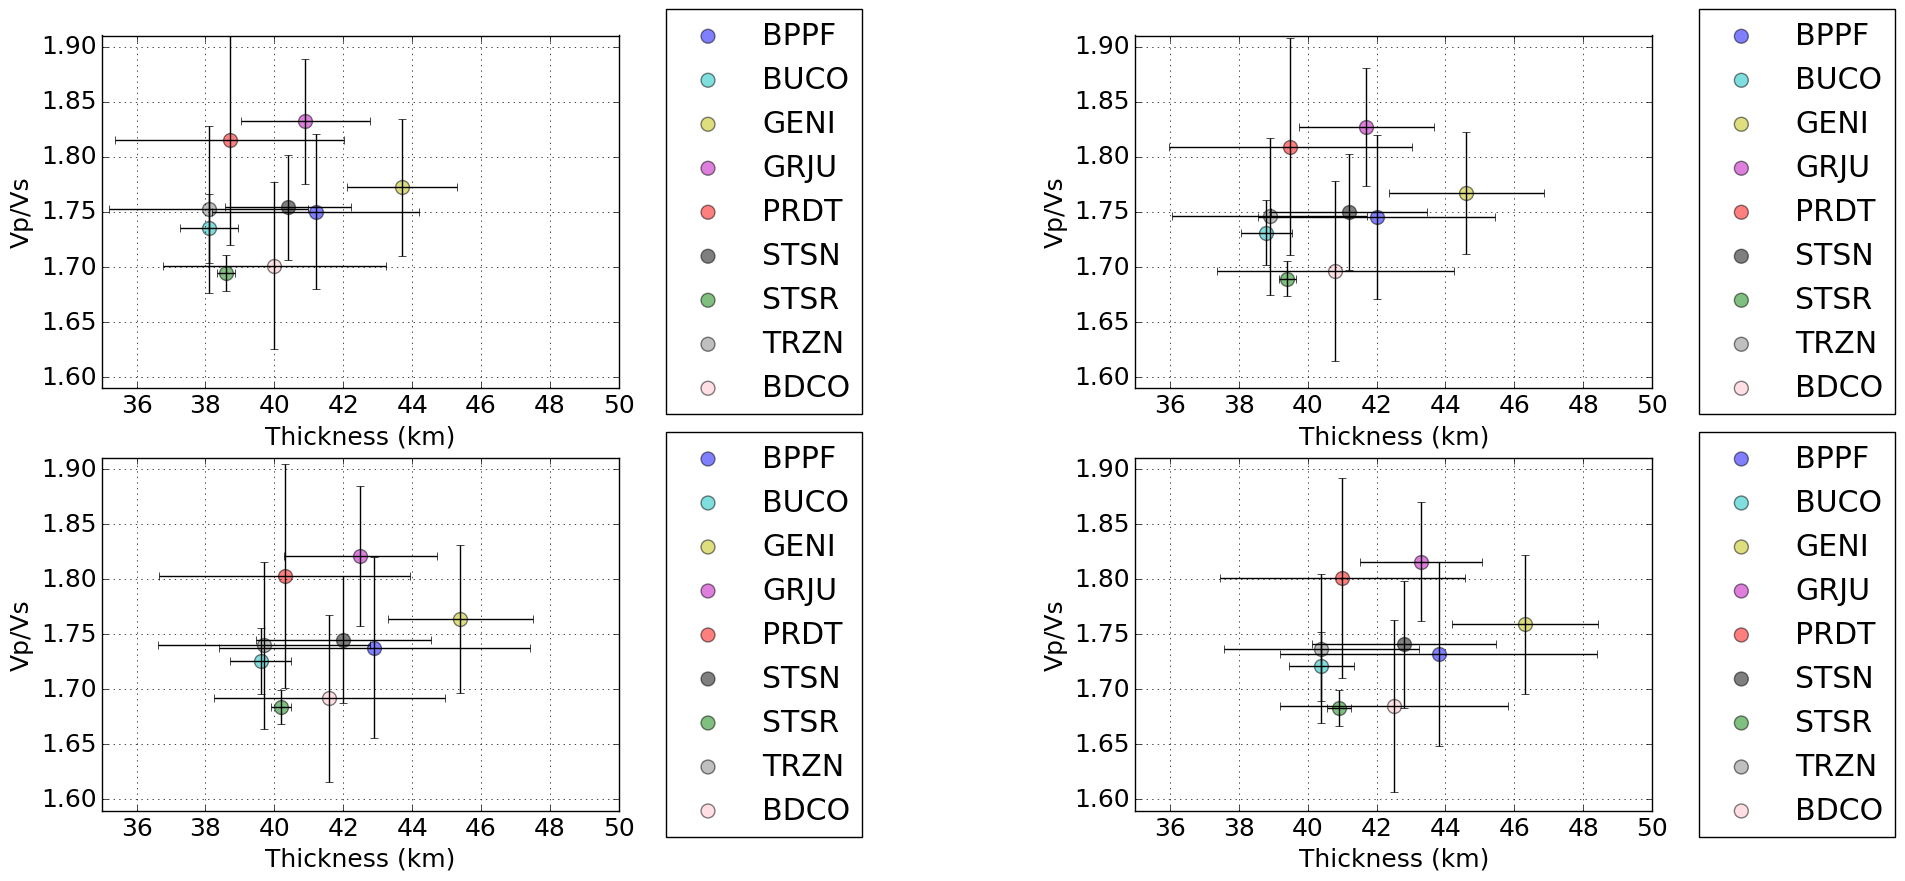

In [89]:
fig = plt.figure(figsize = (20,10),facecolor='white')
gs1 = gridspec.GridSpec(2,2,wspace=1)

for k,l in enumerate(var_25):
    for i,j in enumerate(l):
        ax1 = plt.subplot(gs1[k])
        ax1.scatter(j[2],j[0],c=STA_color[i],s=100,alpha=0.5,cmap=plt.cm.hsv,label=STA_l[i])
        ax1.errorbar(j[2],j[0],yerr=j[1],xerr=j[3],c='k')
        #ax1.text(j[2]-1.8,j[0],STA_l[i])
        ax1.set_xlabel('Thickness (km)')
        ax1.set_ylabel('Vp/Vs')
        ax1.set_xlim([35,50])
        ax1.set_ylim([1.59,1.91])
        ax1.grid(True)
        ax1.legend(scatterpoints=1,loc='right', bbox_to_anchor=(1.5, 0.5))